## Dataset Preparation

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, cos, sin, sqrt, asin
import seaborn as sns

df = pd.read_csv("data/amazon_delivery.csv")

df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [28]:
print(df.info())
# 43,739 total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB
N

In [29]:
print(df.shape)
df.isnull().sum()
# NaN values found in Agent_Rating and Weather

(43739, 16)


Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [30]:
# Imputation: replacing NaN Weather values with the mode "Fog"
print(df['Weather'].mode())

replacement = {"Weather": 'Fog'}
df.fillna(value = replacement, inplace = True)
df.isnull().sum()

0    Fog
Name: Weather, dtype: object


Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather             0
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [31]:
# Dropping remaining NaN values from Agent_Rating and setting it to a new dataframe
df_upd = df.dropna().copy().set_index('Order_ID')

# Checking for more NaN values
check = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
print('Unique Values (Pre-Cleaning):\n')
for i in check:
    print(i, df_upd[i].unique())
# Traffic has 'NaN'

df_upd = df_upd[df_upd['Traffic'] != 'NaN ']

# Trimming whitespace from string columns
df_upd[check] = df_upd[check].apply(lambda r: r.str.strip(), axis = 0)
print('\nUnique Values (Post-Cleaning):\n')
for i in check:
    print(i, df_upd[i].unique())

print('\n', df_upd.describe())
print('\n', df_upd.isna().sum())

Unique Values (Pre-Cleaning):

Weather ['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
Traffic ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
Vehicle ['motorcycle ' 'scooter ' 'van' 'bicycle ']
Area ['Urban ' 'Metropolitian ' 'Semi-Urban ' 'Other']
Category ['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']

Unique Values (Post-Cleaning):

Weather ['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
Traffic ['High' 'Jam' 'Low' 'Medium']
Vehicle ['motorcycle' 'scooter' 'van']
Area ['Urban' 'Metropolitian' 'Semi-Urban' 'Other']
Category ['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']

           Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
count  43594.000000  43594.000000    43594.000000     43594.000000   
mean      29.555719      4.635287

In [1]:
# Turning Order_Time to a datetime
time_format = '%H:%M:%S'
df_upd['Order_Time'] = pd.to_datetime(df_upd['Order_Time'], format = time_format).dt.hour


NameError: name 'pd' is not defined

<Axes: xlabel='Order_Time', ylabel='Count'>

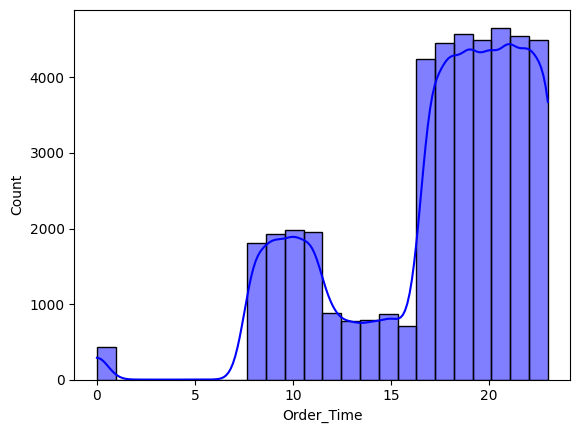

In [35]:
plt.figure()
sns.histplot(df_upd['Order_Time'], kde = True, color = 'blue', bins = 24)

In [17]:
df_upd.head()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Store-Drop_Distance_km,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
Order_ID,,,,,,,,,,,,,,,,
ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,3.025149,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,20.183530,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,1.552758,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,7.790401,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,6.210138,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


## Feature Engineering

### Creating a column for the distance between store and drop points

In [ ]:
# Creating column for Store-Drop Distance values
df_upd.insert(df_upd.columns.get_loc('Drop_Longitude')+1, 'Store-Drop_Distance_km', None)

In [ ]:
def haversine_dist(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    earth_radius = 6371
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    dist = (2*earth_radius) * asin(sqrt((sin(dlat/2)**2) + (cos(lat1)*cos(lat2)*(sin(dlon/2)**2))))
    return dist


# Setting Store-Drop Distance values
df_upd['Store-Drop_Distance_km'] = df_upd.apply(lambda r: haversine_dist(r['Store_Latitude'], r['Store_Longitude'], r['Drop_Latitude'], r['Drop_Longitude']), axis = 1)


In [ ]:
# Removing outliers
Q1 = df_upd['Store-Drop_Distance_km'].quantile(0.25) # first quantile
Q3 = df_upd['Store-Drop_Distance_km'].quantile(0.75) # third quantile
IQR = Q3 - Q1

lowerbound = Q1 - 1.5*IQR
upperbound = Q3 + 1.5*IQR

outliers_mask = ( (df_upd['Store-Drop_Distance_km'] < lowerbound) | (df_upd['Store-Drop_Distance_km'] > upperbound) )
outliers = df_upd[outliers_mask]

print('Before dropping: \n',df_upd.describe())

df_upd.drop(outliers.index, inplace = True)

# 183 entries with outliers in Store-Drop_Distance_km removed
print('\nAfter dropping: \n', df_upd.describe())

### Setting up dataframe with regards to predictors

In [ ]:
# List of columns to test (predictors)
features = ['Agent_Age', 'Store-Drop_Distance_km', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
df_features = df_upd[features].copy()

# Categorical predictors; set as dummies
df_features = pd.get_dummies(df_features, columns=['Weather', 'Traffic', 'Vehicle', 'Area', 'Category'], drop_first = True)

In [ ]:
# Standardizing continuous predictors
df_features.insert(1, 'Agent_Age_z', ((df_features['Agent_Age'] - df_features['Agent_Age'].mean())/df_features['Agent_Age'].std()) )
df_features.insert(3, 'Store-Drop_Distance_z', ((df_features['Store-Drop_Distance_km'] - df_features['Store-Drop_Distance_km'].mean())/df_features['Store-Drop_Distance_km'].std()) )

In [ ]:
# Plotting Agent_Age
plt.figure(1)
sns.histplot(df_features['Agent_Age'], color = 'blue', kde = True, bins = 20)
plt.show()

# Plotting Agent_Age_z
plt.figure(3)
sns.histplot(df_features['Agent_Age_z'], color = 'blue', kde = True, bins = 20)
plt.show()

# Plotting Store-Drop_Distance_km
plt.figure(2)
sns.histplot(df_features['Store-Drop_Distance_km'], color = 'blue', kde = True)
plt.show()

# Plotting Store-Drop_Distance_z
plt.figure(2)
sns.histplot(df_features['Store-Drop_Distance_z'], color = 'blue', kde = True)
plt.show()

## Feature Selection

In [ ]:
# SelectKBest and f_regression
from sklearn.feature_selection import SelectKBest, f_regression
X = df_features.values
y_time = df_upd['Delivery_Time'].values
y_rating = df_upd['Agent_Rating'].values

selector = SelectKBest(score_func = f_regression, k = 6)

X_sel_time = selector.fit_transform(X, y_time)
features_time = df_features.columns[selector.get_support()]
print('Top 6 features selected by ANOVA for Delivery_Time: ', features_time.tolist())

X_sel_rating = selector.fit_transform(X, y_rating)
features_rating = df_features.columns[selector.get_support()]
print('Top 6 features selected by ANOVA for Agent_Rating: ', features_rating.tolist())

In [ ]:
# SelectFromModel using Random Forest Regressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)
sfm = SelectFromModel(rf, threshold = '1.25*median')

# Delivery_Time
sfm.fit(X, y_time)
features_time = df_features.columns[sfm.get_support()]
print('Features selected by RF for Delivery_Time: ', features_time.tolist())

# Agent_Rating
sfm.fit(X, y_rating)
features_rating = df_features.columns[sfm.get_support()]
print('Features selected by RF for Agent_Rating: ', features_rating.tolist())

**Features selected by ANOVA**

Delivery_Time: *Agent_Age, Store-Drop_Distance_km, Weather, Traffic, Category*  
Agent_Rating: *Agent_Age, Store-Drop_Distance_km, Weather, Traffic, Area*

**Features selected by RF**

Delivery_Time: *Agent_Age, Store-Drop_Distance_km, Weather, Traffic, Vehicle, Area, Category*  
Agent_Rating: *Agent_Age, Store-Drop_Distance_km, Weather, Traffic, Vehicle, Area*

**Final list of Features**
1. Agent_Age
2. Store-Drop_Distance_km
3. Weather
4. Traffic
5. Vehicle
6. Area

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

features = ['Agent_Age', 'Store-Drop_Distance_km', 'Weather', 'Traffic', 'Vehicle', 'Area']
df_features = pd.get_dummies(df_upd[features].copy(), columns = ['Weather', 'Traffic', 'Vehicle', 'Area'], drop_first = True)

X = df_features.values
Y = df_upd[['Delivery_Time', 'Agent_Rating']].values

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42 )

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

mdl = LinearRegression()
mdl.fit(X_train, Y_train)

Y_pred = mdl.predict(X_test)

print('Multivariate Linear Regression Model')
print('  [R2] Delivery_Time: \t', r2_score(Y_test[:, 0], Y_pred[:, 0]))
print('  [R2] Agent_Rating: \t', r2_score(Y_test[:, 1], Y_pred[:, 1]))
print('  [RMSE] Delivery_Time:\t', root_mean_squared_error(Y_test[:, 0], Y_pred[:, 0]))
print('  [RMSE] Agent_Rating: \t', root_mean_squared_error(Y_test[:, 1], Y_pred[:, 1]))

**Interpretation**:

**Delivery_Time**  
- R2 = 0.32 means that 32% of the variation in DTs across orders can be predicted by the model
- RMSE = 42.76 means that on average, the model's predictions are off by about 43 time units compared to the actual delivery time.  

**Agent_Rating**
- R2 = 0.04 means that ONLY 4% of the variation in ratings can be predicted by the model

### Decision Trees